In [20]:
!pip install 'sagemaker[local]' --upgrade

In [21]:
!sudo service docker restart

Stopping docker: [  OK  ]
Starting docker:	.[  OK  ]


In [22]:
s3_bucket = 'sagemaker-cookbook-bucket'
prefix = 'chapter03'

In [23]:
train_s3 = \
f"s3://{s3_bucket}/{prefix}/synthetic/training_data.csv" 
val_s3 = \
f"s3://{s3_bucket}/{prefix}/synthetic/validation_data.csv" 

In [24]:
from sagemaker.inputs import TrainingInput
    
train_input = TrainingInput(train_s3, content_type="text/csv")
val_input = TrainingInput(val_s3, content_type="text/csv")

In [25]:
import sagemaker
from sagemaker import get_execution_role
from sagemaker.local import LocalSession

sagemaker_session = LocalSession()
sagemaker_session.config = {'local': {'local_code': True}}

role = get_execution_role()

In [26]:
from sagemaker.mxnet import MXNet

estimator = MXNet(entry_point="mxnet_script.py",
                  role=role,
                  session=sagemaker_session,
                  instance_count=1,
                  instance_type="local",
                  framework_version="1.7.0",
                  py_version="py3")

In [27]:
estimator.fit({'train': train_input, 'validation': val_input})

Creating eyxqv39ho9-algo-1-0fsw3 ... 
Creating eyxqv39ho9-algo-1-0fsw3 ... done
Attaching to eyxqv39ho9-algo-1-0fsw3
eyxqv39ho9-algo-1-0fsw3 | 2021-04-08 21:32:12,146 sagemaker-training-toolkit INFO     Imported framework sagemaker_mxnet_container.training
eyxqv39ho9-algo-1-0fsw3 | 2021-04-08 21:32:12,149 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
eyxqv39ho9-algo-1-0fsw3 | 2021-04-08 21:32:12,163 sagemaker_mxnet_container.training INFO     MXNet training environment: {'SM_HOSTS': '["algo-1-0fsw3"]', 'SM_NETWORK_INTERFACE_NAME': 'eth0', 'SM_HPS': '{}', 'SM_USER_ENTRY_POINT': 'mxnet_script.py', 'SM_FRAMEWORK_PARAMS': '{}', 'SM_RESOURCE_CONFIG': '{"current_host":"algo-1-0fsw3","hosts":["algo-1-0fsw3"]}', 'SM_INPUT_DATA_CONFIG': '{"train":{"ContentType":"text/csv","TrainingInputMode":"File"},"validation":{"ContentType":"text/csv","TrainingInputMode":"File"}}', 'SM_OUTPUT_DATA_DIR': '/opt/ml/output/data', 'SM_CHANNELS': '["train","validation"]', 'SM_C

eyxqv39ho9-algo-1-0fsw3 | x.shape: (640, 1)
eyxqv39ho9-algo-1-0fsw3 | y.shape (640, 1)
eyxqv39ho9-algo-1-0fsw3 | x_val.shape: (160, 1)
eyxqv39ho9-algo-1-0fsw3 | y_val.shape (160, 1)
eyxqv39ho9-algo-1-0fsw3 | Training begin: using optimizer Adam with current learning rate 0.0020 
eyxqv39ho9-algo-1-0fsw3 | Train for 1000 epochs.
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 2113157.1000
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.379s, training l2loss: 2241707.8375
eyxqv39ho9-algo-1-0fsw3 | [Epoch 1] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 1679942.3500
eyxqv39ho9-algo-1-0fsw3 | [Epoch 1] Finished in 0.050s, training l2loss: 1940729.2625
eyxqv39ho9-algo-1-0fsw3 | [Epoch 2] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-

eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 206840.7500
eyxqv39ho9-algo-1-0fsw3 | [Epoch 25] Finished in 0.051s, training l2loss: 228237.7891
eyxqv39ho9-algo-1-0fsw3 | [Epoch 26] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 206811.2625
eyxqv39ho9-algo-1-0fsw3 | [Epoch 26] Finished in 0.051s, training l2loss: 228227.1063
eyxqv39ho9-algo-1-0fsw3 | [Epoch 27] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 206832.5750
eyxqv39ho9-algo-1-0fsw3 | [Epoch 27] Finished in 0.053s, training l2loss: 228228.5672
eyxqv39ho9-algo-1-0fsw3 | [Epoch 28] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 206813.8312
eyxqv39ho9-algo-1-0fsw3 | [Epoch 28] Finish

eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 206626.8750
eyxqv39ho9-algo-1-0fsw3 | [Epoch 53] Finished in 0.053s, training l2loss: 227987.3188
eyxqv39ho9-algo-1-0fsw3 | [Epoch 54] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 206620.2938
eyxqv39ho9-algo-1-0fsw3 | [Epoch 54] Finished in 0.050s, training l2loss: 227977.0609
eyxqv39ho9-algo-1-0fsw3 | [Epoch 55] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 206611.2188
eyxqv39ho9-algo-1-0fsw3 | [Epoch 55] Finished in 0.051s, training l2loss: 227966.3563
eyxqv39ho9-algo-1-0fsw3 | [Epoch 56] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 206599.9125


eyxqv39ho9-algo-1-0fsw3 | [Epoch 81] Finished in 0.050s, training l2loss: 227634.1594
eyxqv39ho9-algo-1-0fsw3 | [Epoch 82] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 206320.6938
eyxqv39ho9-algo-1-0fsw3 | [Epoch 82] Finished in 0.050s, training l2loss: 227619.4375
eyxqv39ho9-algo-1-0fsw3 | [Epoch 83] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 206289.0187
eyxqv39ho9-algo-1-0fsw3 | [Epoch 83] Finished in 0.050s, training l2loss: 227601.3625
eyxqv39ho9-algo-1-0fsw3 | [Epoch 84] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 206282.7313
eyxqv39ho9-algo-1-0fsw3 | [Epoch 84] Finished in 0.050s, training l2loss: 227584.7797
eyxqv39ho9-algo-1-0fsw3 | [Epoch 85] Begin, 

eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 205873.1750
eyxqv39ho9-algo-1-0fsw3 | [Epoch 110] Finished in 0.051s, training l2loss: 227059.7344
eyxqv39ho9-algo-1-0fsw3 | [Epoch 111] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 205759.4000
eyxqv39ho9-algo-1-0fsw3 | [Epoch 111] Finished in 0.050s, training l2loss: 227039.0875
eyxqv39ho9-algo-1-0fsw3 | [Epoch 112] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 205739.2563
eyxqv39ho9-algo-1-0fsw3 | [Epoch 112] Finished in 0.050s, training l2loss: 226990.6594
eyxqv39ho9-algo-1-0fsw3 | [Epoch 113] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 205655.4312
eyxqv39ho9-algo-1-0fsw3 | [Epoch 113]

eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 204866.7687
eyxqv39ho9-algo-1-0fsw3 | [Epoch 135] Finished in 0.051s, training l2loss: 226114.7969
eyxqv39ho9-algo-1-0fsw3 | [Epoch 136] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 204687.3000
eyxqv39ho9-algo-1-0fsw3 | [Epoch 136] Finished in 0.052s, training l2loss: 225867.6047
eyxqv39ho9-algo-1-0fsw3 | [Epoch 137] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 204593.4625
eyxqv39ho9-algo-1-0fsw3 | [Epoch 137] Finished in 0.053s, training l2loss: 225808.1437
eyxqv39ho9-algo-1-0fsw3 | [Epoch 138] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 204645.3125
eyxqv39ho9-algo-1-0fsw3 | [Epoch 138]

eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 201484.7563
eyxqv39ho9-algo-1-0fsw3 | [Epoch 164] Finished in 0.050s, training l2loss: 222523.8203
eyxqv39ho9-algo-1-0fsw3 | [Epoch 165] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 200959.5312
eyxqv39ho9-algo-1-0fsw3 | [Epoch 165] Finished in 0.049s, training l2loss: 222463.1281
eyxqv39ho9-algo-1-0fsw3 | [Epoch 166] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.049s, validation l2loss: 200705.2188
eyxqv39ho9-algo-1-0fsw3 | [Epoch 166] Finished in 0.091s, training l2loss: 222138.7641
eyxqv39ho9-algo-1-0fsw3 | [Epoch 167] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 199909

eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 191914.5250
eyxqv39ho9-algo-1-0fsw3 | [Epoch 189] Finished in 0.052s, training l2loss: 214072.3406
eyxqv39ho9-algo-1-0fsw3 | [Epoch 190] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 191255.3062
eyxqv39ho9-algo-1-0fsw3 | [Epoch 190] Finished in 0.052s, training l2loss: 214438.1734
eyxqv39ho9-algo-1-0fsw3 | [Epoch 191] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 190018.8687
eyxqv39ho9-algo-1-0fsw3 | [Epoch 191] Finished in 0.051s, training l2loss: 212843.7344
eyxqv39ho9-algo-1-0fsw3 | [Epoch 192] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 189251

eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 170026.1875
eyxqv39ho9-algo-1-0fsw3 | [Epoch 214] Finished in 0.049s, training l2loss: 194097.2891
eyxqv39ho9-algo-1-0fsw3 | [Epoch 215] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 168490.7875
eyxqv39ho9-algo-1-0fsw3 | [Epoch 215] Finished in 0.050s, training l2loss: 192582.6172
eyxqv39ho9-algo-1-0fsw3 | [Epoch 216] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 166742.7062
eyxqv39ho9-algo-1-0fsw3 | [Epoch 216] Finished in 0.049s, training l2loss: 192728.7906
eyxqv39ho9-algo-1-0fsw3 | [Epoch 217] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 165360

eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 133844.8344
eyxqv39ho9-algo-1-0fsw3 | [Epoch 240] Finished in 0.051s, training l2loss: 169017.3328
eyxqv39ho9-algo-1-0fsw3 | [Epoch 241] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 132395.3438
eyxqv39ho9-algo-1-0fsw3 | [Epoch 241] Finished in 0.050s, training l2loss: 168009.5984
eyxqv39ho9-algo-1-0fsw3 | [Epoch 242] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 131334.8781
eyxqv39ho9-algo-1-0fsw3 | [Epoch 242] Finished in 0.050s, training l2loss: 166819.0172
eyxqv39ho9-algo-1-0fsw3 | [Epoch 243] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 130618

eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 121961.6906
eyxqv39ho9-algo-1-0fsw3 | [Epoch 268] Finished in 0.056s, training l2loss: 151278.1688
eyxqv39ho9-algo-1-0fsw3 | [Epoch 269] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 111138.3750
eyxqv39ho9-algo-1-0fsw3 | [Epoch 269] Finished in 0.050s, training l2loss: 149094.5492
eyxqv39ho9-algo-1-0fsw3 | [Epoch 270] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 104205.7031
eyxqv39ho9-algo-1-0fsw3 | [Epoch 270] Finished in 0.050s, training l2loss: 144158.1172
eyxqv39ho9-algo-1-0fsw3 | [Epoch 271] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 102033.3969
eyxqv39ho9-algo-1-0fsw3 | [Epoch 271]

eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.047s, validation l2loss: 103357.6219
eyxqv39ho9-algo-1-0fsw3 | [Epoch 297] Finished in 0.089s, training l2loss: 111422.7875
eyxqv39ho9-algo-1-0fsw3 | [Epoch 298] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 111967.6406
eyxqv39ho9-algo-1-0fsw3 | [Epoch 298] Finished in 0.052s, training l2loss: 114450.4539
eyxqv39ho9-algo-1-0fsw3 | [Epoch 299] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 119350.0000
eyxqv39ho9-algo-1-0fsw3 | [Epoch 299] Finished in 0.051s, training l2loss: 121197.3859
eyxqv39ho9-algo-1-0fsw3 | [Epoch 300] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 113075.0906
eyxqv39ho9-algo-1-0fsw3 | [Epoch 300]

eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 101013.0469
eyxqv39ho9-algo-1-0fsw3 | [Epoch 327] Finished in 0.051s, training l2loss: 105935.3793
eyxqv39ho9-algo-1-0fsw3 | [Epoch 328] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 94453.1562
eyxqv39ho9-algo-1-0fsw3 | [Epoch 328] Finished in 0.053s, training l2loss: 104648.0070
eyxqv39ho9-algo-1-0fsw3 | [Epoch 329] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 90397.5297
eyxqv39ho9-algo-1-0fsw3 | [Epoch 329] Finished in 0.051s, training l2loss: 101717.9691
eyxqv39ho9-algo-1-0fsw3 | [Epoch 330] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 86629.57

eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 86849.3781
eyxqv39ho9-algo-1-0fsw3 | [Epoch 355] Finished in 0.052s, training l2loss: 81369.5355
eyxqv39ho9-algo-1-0fsw3 | [Epoch 356] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 88157.6281
eyxqv39ho9-algo-1-0fsw3 | [Epoch 356] Finished in 0.051s, training l2loss: 82462.2102
eyxqv39ho9-algo-1-0fsw3 | [Epoch 357] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 88286.8000
eyxqv39ho9-algo-1-0fsw3 | [Epoch 357] Finished in 0.051s, training l2loss: 82493.9195
eyxqv39ho9-algo-1-0fsw3 | [Epoch 358] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 89687.8562
e

eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 59068.8938
eyxqv39ho9-algo-1-0fsw3 | [Epoch 383] Finished in 0.054s, training l2loss: 72072.0547
eyxqv39ho9-algo-1-0fsw3 | [Epoch 384] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 61554.1500
eyxqv39ho9-algo-1-0fsw3 | [Epoch 384] Finished in 0.051s, training l2loss: 70615.7113
eyxqv39ho9-algo-1-0fsw3 | [Epoch 385] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 70160.0063
eyxqv39ho9-algo-1-0fsw3 | [Epoch 385] Finished in 0.051s, training l2loss: 67137.9820
eyxqv39ho9-algo-1-0fsw3 | [Epoch 386] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 76002.3719
e

eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 79364.9062
eyxqv39ho9-algo-1-0fsw3 | [Epoch 411] Finished in 0.052s, training l2loss: 67633.1984
eyxqv39ho9-algo-1-0fsw3 | [Epoch 412] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 75531.5391
eyxqv39ho9-algo-1-0fsw3 | [Epoch 412] Finished in 0.050s, training l2loss: 67074.6117
eyxqv39ho9-algo-1-0fsw3 | [Epoch 413] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 80759.1344
eyxqv39ho9-algo-1-0fsw3 | [Epoch 413] Finished in 0.050s, training l2loss: 65655.7254
eyxqv39ho9-algo-1-0fsw3 | [Epoch 414] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 83586.4438
e

eyxqv39ho9-algo-1-0fsw3 | [Epoch 439] Finished in 0.050s, training l2loss: 40137.9053
eyxqv39ho9-algo-1-0fsw3 | [Epoch 440] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 45341.4594
eyxqv39ho9-algo-1-0fsw3 | [Epoch 440] Finished in 0.050s, training l2loss: 38938.9133
eyxqv39ho9-algo-1-0fsw3 | [Epoch 441] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 42768.9187
eyxqv39ho9-algo-1-0fsw3 | [Epoch 441] Finished in 0.050s, training l2loss: 37355.8068
eyxqv39ho9-algo-1-0fsw3 | [Epoch 442] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 37717.8586
eyxqv39ho9-algo-1-0fsw3 | [Epoch 442] Finished in 0.050s, training l2loss: 34984.4576
eyxqv39ho9-algo-1-0fsw3 | [Epoch 443] Begin,

eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 15752.2445
eyxqv39ho9-algo-1-0fsw3 | [Epoch 468] Finished in 0.054s, training l2loss: 18425.9660
eyxqv39ho9-algo-1-0fsw3 | [Epoch 469] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 15690.4449
eyxqv39ho9-algo-1-0fsw3 | [Epoch 469] Finished in 0.050s, training l2loss: 18321.7705
eyxqv39ho9-algo-1-0fsw3 | [Epoch 470] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 15464.0773
eyxqv39ho9-algo-1-0fsw3 | [Epoch 470] Finished in 0.052s, training l2loss: 17983.9324
eyxqv39ho9-algo-1-0fsw3 | [Epoch 471] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 15380.7836
eyxqv39ho9-algo-1-0fsw3 | [Epoch 471] Finish

eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 14908.5613
eyxqv39ho9-algo-1-0fsw3 | [Epoch 496] Finished in 0.051s, training l2loss: 19682.0387
eyxqv39ho9-algo-1-0fsw3 | [Epoch 497] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 13222.0027
eyxqv39ho9-algo-1-0fsw3 | [Epoch 497] Finished in 0.051s, training l2loss: 19986.0717
eyxqv39ho9-algo-1-0fsw3 | [Epoch 498] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 15601.4445
eyxqv39ho9-algo-1-0fsw3 | [Epoch 498] Finished in 0.055s, training l2loss: 19889.3436
eyxqv39ho9-algo-1-0fsw3 | [Epoch 499] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 13206.7391
eyxqv39ho9-algo-1-0fsw3 | [Epoch 499] Finish

eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 13508.5969
eyxqv39ho9-algo-1-0fsw3 | [Epoch 524] Finished in 0.051s, training l2loss: 13632.7493
eyxqv39ho9-algo-1-0fsw3 | [Epoch 525] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 12678.2641
eyxqv39ho9-algo-1-0fsw3 | [Epoch 525] Finished in 0.051s, training l2loss: 13295.3246
eyxqv39ho9-algo-1-0fsw3 | [Epoch 526] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 12896.9996
eyxqv39ho9-algo-1-0fsw3 | [Epoch 526] Finished in 0.050s, training l2loss: 12930.3340
eyxqv39ho9-algo-1-0fsw3 | [Epoch 527] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 12678.8348
eyxqv39ho9-algo-1-0fsw3 | [Epoch 527] Finish

eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 12605.3789
eyxqv39ho9-algo-1-0fsw3 | [Epoch 552] Finished in 0.050s, training l2loss: 12276.2893
eyxqv39ho9-algo-1-0fsw3 | [Epoch 553] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 12604.3887
eyxqv39ho9-algo-1-0fsw3 | [Epoch 553] Finished in 0.050s, training l2loss: 12156.8419
eyxqv39ho9-algo-1-0fsw3 | [Epoch 554] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 12555.5578
eyxqv39ho9-algo-1-0fsw3 | [Epoch 554] Finished in 0.050s, training l2loss: 12037.1888
eyxqv39ho9-algo-1-0fsw3 | [Epoch 555] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 12720.2344
e

eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.010s, validation l2loss: 12667.8820
eyxqv39ho9-algo-1-0fsw3 | [Epoch 580] Finished in 0.052s, training l2loss: 12696.7111
eyxqv39ho9-algo-1-0fsw3 | [Epoch 581] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 12684.4070
eyxqv39ho9-algo-1-0fsw3 | [Epoch 581] Finished in 0.051s, training l2loss: 12210.7932
eyxqv39ho9-algo-1-0fsw3 | [Epoch 582] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 12674.5578
eyxqv39ho9-algo-1-0fsw3 | [Epoch 582] Finished in 0.050s, training l2loss: 12085.7162
eyxqv39ho9-algo-1-0fsw3 | [Epoch 583] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 12716.4703
eyxqv39ho9-algo-1-0fsw3 | [Epoch 583] Finish

eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 13068.1387
eyxqv39ho9-algo-1-0fsw3 | [Epoch 606] Finished in 0.050s, training l2loss: 13851.4818
eyxqv39ho9-algo-1-0fsw3 | [Epoch 607] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 12970.3074
eyxqv39ho9-algo-1-0fsw3 | [Epoch 607] Finished in 0.051s, training l2loss: 15792.0642
eyxqv39ho9-algo-1-0fsw3 | [Epoch 608] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 14262.7039
eyxqv39ho9-algo-1-0fsw3 | [Epoch 608] Finished in 0.050s, training l2loss: 14753.9204
eyxqv39ho9-algo-1-0fsw3 | [Epoch 609] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 12853.8969
e

eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 19577.6348
eyxqv39ho9-algo-1-0fsw3 | [Epoch 632] Finished in 0.050s, training l2loss: 22757.2678
eyxqv39ho9-algo-1-0fsw3 | [Epoch 633] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 15672.4672
eyxqv39ho9-algo-1-0fsw3 | [Epoch 633] Finished in 0.050s, training l2loss: 17456.0847
eyxqv39ho9-algo-1-0fsw3 | [Epoch 634] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 14012.6234
eyxqv39ho9-algo-1-0fsw3 | [Epoch 634] Finished in 0.049s, training l2loss: 13580.2310
eyxqv39ho9-algo-1-0fsw3 | [Epoch 635] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 13659.3207
e

eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 13076.9879
eyxqv39ho9-algo-1-0fsw3 | [Epoch 658] Finished in 0.053s, training l2loss: 16376.4854
eyxqv39ho9-algo-1-0fsw3 | [Epoch 659] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 15691.6582
eyxqv39ho9-algo-1-0fsw3 | [Epoch 659] Finished in 0.051s, training l2loss: 14806.7224
eyxqv39ho9-algo-1-0fsw3 | [Epoch 660] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 13166.4867
eyxqv39ho9-algo-1-0fsw3 | [Epoch 660] Finished in 0.051s, training l2loss: 12801.3439
eyxqv39ho9-algo-1-0fsw3 | [Epoch 661] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 13029.9766
e

eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 13026.4418
eyxqv39ho9-algo-1-0fsw3 | [Epoch 687] Finished in 0.052s, training l2loss: 12168.2789
eyxqv39ho9-algo-1-0fsw3 | [Epoch 688] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 12841.7172
eyxqv39ho9-algo-1-0fsw3 | [Epoch 688] Finished in 0.050s, training l2loss: 12433.6905
eyxqv39ho9-algo-1-0fsw3 | [Epoch 689] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 13468.6484
eyxqv39ho9-algo-1-0fsw3 | [Epoch 689] Finished in 0.050s, training l2loss: 14221.6470
eyxqv39ho9-algo-1-0fsw3 | [Epoch 690] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.044s, validation l2loss: 14398.7070
eyxqv39ho9-algo-1-0fsw3 | [Epoch 690] Finish

eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 15342.8926
eyxqv39ho9-algo-1-0fsw3 | [Epoch 713] Finished in 0.050s, training l2loss: 14467.9735
eyxqv39ho9-algo-1-0fsw3 | [Epoch 714] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 15297.4926
eyxqv39ho9-algo-1-0fsw3 | [Epoch 714] Finished in 0.050s, training l2loss: 13384.6109
eyxqv39ho9-algo-1-0fsw3 | [Epoch 715] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 13621.5641
eyxqv39ho9-algo-1-0fsw3 | [Epoch 715] Finished in 0.050s, training l2loss: 12590.2923
eyxqv39ho9-algo-1-0fsw3 | [Epoch 716] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 13072.2363
eyxqv39ho9-algo-1-0fsw3 | [Epoch 716] Finish

eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 15153.8508
eyxqv39ho9-algo-1-0fsw3 | [Epoch 740] Finished in 0.049s, training l2loss: 14909.7621
eyxqv39ho9-algo-1-0fsw3 | [Epoch 741] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 14945.0543
eyxqv39ho9-algo-1-0fsw3 | [Epoch 741] Finished in 0.049s, training l2loss: 14794.6312
eyxqv39ho9-algo-1-0fsw3 | [Epoch 742] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 14966.8168
eyxqv39ho9-algo-1-0fsw3 | [Epoch 742] Finished in 0.049s, training l2loss: 14882.7413
eyxqv39ho9-algo-1-0fsw3 | [Epoch 743] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 14847.6648
e

eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.010s, validation l2loss: 13118.0211
eyxqv39ho9-algo-1-0fsw3 | [Epoch 765] Finished in 0.050s, training l2loss: 13106.2764
eyxqv39ho9-algo-1-0fsw3 | [Epoch 766] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 13600.4965
eyxqv39ho9-algo-1-0fsw3 | [Epoch 766] Finished in 0.049s, training l2loss: 12578.1051
eyxqv39ho9-algo-1-0fsw3 | [Epoch 767] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 12974.7973
eyxqv39ho9-algo-1-0fsw3 | [Epoch 767] Finished in 0.051s, training l2loss: 11957.1370
eyxqv39ho9-algo-1-0fsw3 | [Epoch 768] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 12973.1656
eyxqv39ho9-algo-1-0fsw3 | [Epoch 768] Finish

eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 13243.5035
eyxqv39ho9-algo-1-0fsw3 | [Epoch 791] Finished in 0.051s, training l2loss: 12210.6261
eyxqv39ho9-algo-1-0fsw3 | [Epoch 792] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 12967.2324
eyxqv39ho9-algo-1-0fsw3 | [Epoch 792] Finished in 0.050s, training l2loss: 12445.5486
eyxqv39ho9-algo-1-0fsw3 | [Epoch 793] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 13072.0781
eyxqv39ho9-algo-1-0fsw3 | [Epoch 793] Finished in 0.051s, training l2loss: 12620.2018
eyxqv39ho9-algo-1-0fsw3 | [Epoch 794] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 12992.6055
e

eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 15579.0641
eyxqv39ho9-algo-1-0fsw3 | [Epoch 817] Finished in 0.050s, training l2loss: 15161.1025
eyxqv39ho9-algo-1-0fsw3 | [Epoch 818] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 13111.8813
eyxqv39ho9-algo-1-0fsw3 | [Epoch 818] Finished in 0.050s, training l2loss: 13928.4105
eyxqv39ho9-algo-1-0fsw3 | [Epoch 819] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 13098.5590
eyxqv39ho9-algo-1-0fsw3 | [Epoch 819] Finished in 0.049s, training l2loss: 14470.3381
eyxqv39ho9-algo-1-0fsw3 | [Epoch 820] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 13850.8516
eyxqv39ho9-algo-1-0fsw3 | [Epoch 820] Finish

eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 13391.6031
eyxqv39ho9-algo-1-0fsw3 | [Epoch 843] Finished in 0.050s, training l2loss: 12626.3618
eyxqv39ho9-algo-1-0fsw3 | [Epoch 844] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 13792.9840
eyxqv39ho9-algo-1-0fsw3 | [Epoch 844] Finished in 0.050s, training l2loss: 13571.4494
eyxqv39ho9-algo-1-0fsw3 | [Epoch 845] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 14001.2113
eyxqv39ho9-algo-1-0fsw3 | [Epoch 845] Finished in 0.050s, training l2loss: 15743.3586
eyxqv39ho9-algo-1-0fsw3 | [Epoch 846] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 15495.0949
eyxqv39ho9-algo-1-0fsw3 | [Epoch 846] Finish

eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 13189.4590
eyxqv39ho9-algo-1-0fsw3 | [Epoch 870] Finished in 0.049s, training l2loss: 12006.0559
eyxqv39ho9-algo-1-0fsw3 | [Epoch 871] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 13185.5211
eyxqv39ho9-algo-1-0fsw3 | [Epoch 871] Finished in 0.049s, training l2loss: 11807.8430
eyxqv39ho9-algo-1-0fsw3 | [Epoch 872] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 13116.4562
eyxqv39ho9-algo-1-0fsw3 | [Epoch 872] Finished in 0.050s, training l2loss: 11797.7259
eyxqv39ho9-algo-1-0fsw3 | [Epoch 873] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 13100.0297
e

eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 13559.8027
eyxqv39ho9-algo-1-0fsw3 | [Epoch 896] Finished in 0.050s, training l2loss: 12992.2516
eyxqv39ho9-algo-1-0fsw3 | [Epoch 897] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 13233.5027
eyxqv39ho9-algo-1-0fsw3 | [Epoch 897] Finished in 0.049s, training l2loss: 12320.5429
eyxqv39ho9-algo-1-0fsw3 | [Epoch 898] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 13196.8066
eyxqv39ho9-algo-1-0fsw3 | [Epoch 898] Finished in 0.049s, training l2loss: 11938.7424
eyxqv39ho9-algo-1-0fsw3 | [Epoch 899] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 13111.3984
eyxqv39ho9-algo-1-0fsw3 | [Epoch 899] Finish

eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 15780.1281
eyxqv39ho9-algo-1-0fsw3 | [Epoch 922] Finished in 0.050s, training l2loss: 15085.2419
eyxqv39ho9-algo-1-0fsw3 | [Epoch 923] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 13188.6742
eyxqv39ho9-algo-1-0fsw3 | [Epoch 923] Finished in 0.049s, training l2loss: 12493.8112
eyxqv39ho9-algo-1-0fsw3 | [Epoch 924] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 13068.4980
eyxqv39ho9-algo-1-0fsw3 | [Epoch 924] Finished in 0.049s, training l2loss: 12046.9688
eyxqv39ho9-algo-1-0fsw3 | [Epoch 925] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 13380.7379
e

eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 15645.6176
eyxqv39ho9-algo-1-0fsw3 | [Epoch 948] Finished in 0.051s, training l2loss: 14829.2389
eyxqv39ho9-algo-1-0fsw3 | [Epoch 949] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 13347.8062
eyxqv39ho9-algo-1-0fsw3 | [Epoch 949] Finished in 0.050s, training l2loss: 13689.4945
eyxqv39ho9-algo-1-0fsw3 | [Epoch 950] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 13311.7230
eyxqv39ho9-algo-1-0fsw3 | [Epoch 950] Finished in 0.049s, training l2loss: 12313.4873
eyxqv39ho9-algo-1-0fsw3 | [Epoch 951] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 13139.6172
eyxqv39ho9-algo-1-0fsw3 | [Epoch 951] Finish

eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 22030.0172
eyxqv39ho9-algo-1-0fsw3 | [Epoch 974] Finished in 0.052s, training l2loss: 25317.1077
eyxqv39ho9-algo-1-0fsw3 | [Epoch 975] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 15555.2605
eyxqv39ho9-algo-1-0fsw3 | [Epoch 975] Finished in 0.050s, training l2loss: 14542.9562
eyxqv39ho9-algo-1-0fsw3 | [Epoch 976] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 13089.8660
eyxqv39ho9-algo-1-0fsw3 | [Epoch 976] Finished in 0.051s, training l2loss: 12635.0593
eyxqv39ho9-algo-1-0fsw3 | [Epoch 977] Begin, current learning rate: 0.0020
eyxqv39ho9-algo-1-0fsw3 | Validation Begin
eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.008s, validation l2loss: 13191.4992
e

eyxqv39ho9-algo-1-0fsw3 | [Epoch 0] Finished in 0.009s, validation l2loss: 13740.3734
eyxqv39ho9-algo-1-0fsw3 | [Epoch 999] Finished in 0.051s, training l2loss: 17876.8863
eyxqv39ho9-algo-1-0fsw3 | Train finished using total 51s with 1000 epochs. training l2loss: 17876.8863
eyxqv39ho9-algo-1-0fsw3 | HybridSequential(
eyxqv39ho9-algo-1-0fsw3 |   (0): Dense(1 -> 100, Activation(relu))
eyxqv39ho9-algo-1-0fsw3 |   (1): Dense(100 -> 100, Activation(relu))
eyxqv39ho9-algo-1-0fsw3 |   (2): Dense(100 -> 1, linear)
eyxqv39ho9-algo-1-0fsw3 | )
eyxqv39ho9-algo-1-0fsw3 | 2021-04-08 21:33:06,349 sagemaker-training-toolkit INFO     Reporting training SUCCESS
eyxqv39ho9-algo-1-0fsw3 exited with code 0
Aborting on container exit...
===== Job Complete =====


In [28]:
predictor = estimator.deploy(initial_instance_count=1, 
                             instance_type='local')

Attaching to frifd1l3og-algo-1-zdsou
frifd1l3og-algo-1-zdsou | Warning: Calling MMS with mxnet-model-server. Please move to multi-model-server.
frifd1l3og-algo-1-zdsou | 2021-04-08 21:33:11,551 [INFO ] main com.amazonaws.ml.mms.ModelServer - 
frifd1l3og-algo-1-zdsou | MMS Home: /usr/local/lib/python3.6/site-packages
frifd1l3og-algo-1-zdsou | Current directory: /
frifd1l3og-algo-1-zdsou | Temp directory: /home/model-server/tmp
frifd1l3og-algo-1-zdsou | Number of GPUs: 0
frifd1l3og-algo-1-zdsou | Number of CPUs: 2
frifd1l3og-algo-1-zdsou | Max heap size: 878 M
frifd1l3og-algo-1-zdsou | Python executable: /usr/local/bin/python3.6
frifd1l3og-algo-1-zdsou | Config file: /etc/sagemaker-mms.properties
frifd1l3og-algo-1-zdsou | Inference address: http://0.0.0.0:8080
frifd1l3og-algo-1-zdsou | Management address: http://0.0.0.0:8080
frifd1l3og-algo-1-zdsou | Model Store: /.sagemaker/mms/models
frifd1l3og-algo-1-zdsou | Initial Models: ALL
frifd1l3og-algo-1-zdsou | Log dir: /logs
frifd1l3og-algo-

In [29]:
import numpy as np

predictor.predict(np.array([[10], [15]], dtype=np.float32))

frifd1l3og-algo-1-zdsou | 2021-04-08 21:33:13,651 [INFO ] W-9000-model-stdout com.amazonaws.ml.mms.wlm.WorkerLifeCycle - Model model loaded io_fd=0242acfffe120002-00000020-00000002-e53178c0c1b74112-5443b020
frifd1l3og-algo-1-zdsou | 2021-04-08 21:33:13,654 [INFO ] W-9000-model com.amazonaws.ml.mms.wlm.WorkerThread - Backend response time: 1684
frifd1l3og-algo-1-zdsou | 2021-04-08 21:33:13,656 [WARN ] W-9000-model com.amazonaws.ml.mms.wlm.WorkerLifeCycle - attachIOStreams() threadName=W-model-1
frifd1l3og-algo-1-zdsou | 2021-04-08 21:33:13,672 [INFO ] W-9000-model-stdout com.amazonaws.ml.mms.wlm.WorkerLifeCycle - Model model loaded io_fd=0242acfffe120002-00000020-00000000-e68c03c0c1b7410c-a8875317
frifd1l3og-algo-1-zdsou | 2021-04-08 21:33:13,673 [INFO ] W-9000-model com.amazonaws.ml.mms.wlm.WorkerThread - Backend response time: 1683
frifd1l3og-algo-1-zdsou | 2021-04-08 21:33:13,674 [WARN ] W-9000-model com.amazonaws.ml.mms.wlm.WorkerLifeCycle - attachIOStreams() threadName=W-model-2
fr

[[145.7530975341797], [152.5038299560547]]

In [30]:
!mkdir -p tmp

In [31]:
all_s3 = \
f"s3://{s3_bucket}/{prefix}/synthetic/all_data.csv" 
!aws s3 cp {all_s3} tmp/all_data.csv

download: s3://sagemaker-cookbook-bucket/chapter03/synthetic/all_data.csv to tmp/all_data.csv


In [32]:
import pandas as pd

all_data = pd.read_csv("tmp/all_data.csv", header=None)
x = all_data[[1]].values
y = all_data[[0]].values

In [33]:
from numpy import arange

line_x = arange(-5000, 5000, 10)
line_x

array([-5000, -4990, -4980, -4970, -4960, -4950, -4940, -4930, -4920,
       -4910, -4900, -4890, -4880, -4870, -4860, -4850, -4840, -4830,
       -4820, -4810, -4800, -4790, -4780, -4770, -4760, -4750, -4740,
       -4730, -4720, -4710, -4700, -4690, -4680, -4670, -4660, -4650,
       -4640, -4630, -4620, -4610, -4600, -4590, -4580, -4570, -4560,
       -4550, -4540, -4530, -4520, -4510, -4500, -4490, -4480, -4470,
       -4460, -4450, -4440, -4430, -4420, -4410, -4400, -4390, -4380,
       -4370, -4360, -4350, -4340, -4330, -4320, -4310, -4300, -4290,
       -4280, -4270, -4260, -4250, -4240, -4230, -4220, -4210, -4200,
       -4190, -4180, -4170, -4160, -4150, -4140, -4130, -4120, -4110,
       -4100, -4090, -4080, -4070, -4060, -4050, -4040, -4030, -4020,
       -4010, -4000, -3990, -3980, -3970, -3960, -3950, -3940, -3930,
       -3920, -3910, -3900, -3890, -3880, -3870, -3860, -3850, -3840,
       -3830, -3820, -3810, -3800, -3790, -3780, -3770, -3760, -3750,
       -3740, -3730,

In [34]:
input_data = np.array(line_x.reshape(-1, 1), dtype=np.float32)
result = predictor.predict(input_data)

result

frifd1l3og-algo-1-zdsou | 2021-04-08 21:33:14,819 [INFO ] W-9000-model com.amazonaws.ml.mms.wlm.WorkerThread - Backend response time: 36
frifd1l3og-algo-1-zdsou | 2021-04-08 21:33:14,820 [INFO ] W-9000-model ACCESS_LOG - /172.18.0.1:47274 "POST /invocations HTTP/1.1" 200 39


[[1204.754638671875],
 [1200.8028564453125],
 [1196.6904296875],
 [1192.3170166015625],
 [1187.815673828125],
 [1182.9591064453125],
 [1177.744384765625],
 [1172.308837890625],
 [1166.7479248046875],
 [1160.9405517578125],
 [1155.105712890625],
 [1148.937744140625],
 [1142.5968017578125],
 [1136.1724853515625],
 [1129.57373046875],
 [1122.9132080078125],
 [1116.07763671875],
 [1109.0054931640625],
 [1101.681884765625],
 [1094.358154296875],
 [1087.0343017578125],
 [1079.7105712890625],
 [1072.3868408203125],
 [1065.0631103515625],
 [1057.739013671875],
 [1050.4154052734375],
 [1042.9228515625],
 [1035.3948974609375],
 [1027.7987060546875],
 [1019.4946899414062],
 [1011.1901245117188],
 [1002.8858032226562],
 [994.5813598632812],
 [986.276611328125],
 [977.9722290039062],
 [969.667724609375],
 [961.3632202148438],
 [953.0587768554688],
 [944.7542724609375],
 [936.4497680664062],
 [928.145263671875],
 [919.8406982421875],
 [911.5361938476562],
 [903.231689453125],
 [894.9270629882812],
 

In [35]:
line_y = result

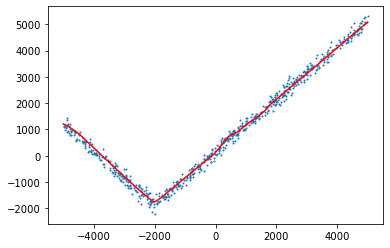

In [36]:
from matplotlib import pyplot
pyplot.plot(line_x, line_y, 'r')
pyplot.scatter(x,y,s=1)
pyplot.show()

In [37]:
predictor.delete_endpoint()

Gracefully stopping... (press Ctrl+C again to force)
